In [27]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
# import tensorflow 
# import keras
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from keras import regularizers
from keras.layers import Dropout
from sklearn.metrics import classification_report
from keras.optimizers import Nadam
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
#Load the data and assign columns
drivers = pd.read_csv('drivers.csv', names = ['id','carno','initials','name'], header = None )
fcyphases = pd.read_csv('fcyphases.csv', names = ['id','race_id','startracetime','endracetime',
                                                  'startraceprog','endraceprog','startlap','endlap','type'], header = None)
laps = pd.read_csv('laps.csv', low_memory = False, 
                                        names = ['race_id','lapno','position','driver_id','laptime','racetime','gap','interval',
                                        'compound','tireage','pitintime','pitstopduration','nextcompound','startlapprog_vsc',
                                        'endlapprog_vsc','age_vsc','startlapprog_sc','endlapprog_sc','age_sc'],header = None)
qualifyings = pd.read_csv('qualifyings.csv', names = ['race_id','position','driver_id','q1laptime','q2laptime',
                                                      'q3laptime','speedtrap'], header = None)
races = pd.read_csv('races.csv', names = [ 'id','date','season','location','availablecompounds','comment','nolaps',
                                          'nolapsplanned','tracklength'], header = None)
retirements = pd.read_csv('retirements.csv', names = ['season','driver_id','accidents','failures'], header = None)
starterfields = pd.read_csv('starterfields.csv', names = ['race_id','driver_id','team','teamcolor','enginemanufacturer',
                                                          'gridposition','status','resultposition','completedlaps',
                                                          'speedtrap'], header = None)


In [53]:
drivers   #displaying names of all drivers

,id,carno,initials,name
0,id,carno,initials,name
1,1,44,HAM,Lewis Hamilton
2,2,3,RIC,Daniel Ricciardo
3,3,6,ROS,Nico Rosberg
4,4,20,MAG,Kevin Magnussen
5,5,14,ALO,Fernando Alonso
6,6,25,VER,Jean-Eric Vergne
7,7,27,HUL,Nico Hulkenberg
8,8,26,KVY,Daniil Kvyat
9,9,19,MAS,Felipe Massa


In [3]:
laps.shape 
laps['racetime'].describe()
display(laps.dtypes)
# analyzing the laps dataframe

race_id             object
lapno               object
position            object
driver_id           object
laptime             object
racetime            object
gap                 object
interval            object
compound            object
tireage             object
pitintime           object
pitstopduration     object
nextcompound        object
startlapprog_vsc    object
endlapprog_vsc      object
age_vsc             object
startlapprog_sc     object
endlapprog_sc       object
age_sc              object
dtype: object

In [17]:
k1 = laps[['lapno', 'position', 'laptime', 'racetime', 'gap', 'interval', 'tireage', 'pitstopduration']]
# k1["lapno"] = k1.lapno.astype(float)
# k1["position"] = k1.position.astype(float)
# k1["laptime"] = k1.laptime.astype(float)
# k1["racetime"] = k1.racetime.astype(float)
# k1["gap"] = k1.gap.astype(float)
# k1["interval"] = k1.interval.astype(float)
# k1["tireage"] = k1.tireage.astype(float)
# k1["pitstopduration"] = k1.pitstopduration.astype(float)
k1["lapno"] = pd.to_numeric(k1.lapno, errors='coerce')
k1["position"] = pd.to_numeric(k1.position, errors='coerce')
k1["laptime"] = pd.to_numeric(k1.laptime, errors='coerce')
k1["racetime"] = pd.to_numeric(k1.racetime, errors='coerce')
k1["interval"] = pd.to_numeric(k1.interval, errors='coerce')
k1["tireage"] = pd.to_numeric(k1.tireage, errors='coerce')
k1["pitstopduration"] = pd.to_numeric(k1.pitstopduration, errors='coerce')
k1["gap"] = pd.to_numeric(k1.gap, errors='coerce')
corrmat = k1.corr()
corrmat 
# Printing the correlation matrix for laps dataframe

C:\Users\Alister\AppData\Local\Temp\ipykernel_26432\3333372756.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k1["lapno"] = pd.to_numeric(k1.lapno, errors='coerce')
C:\Users\Alister\AppData\Local\Temp\ipykernel_26432\3333372756.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k1["position"] = pd.to_numeric(k1.position, errors='coerce')
C:\Users\Alister\AppData\Local\Temp\ipykernel_26432\3333372756.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,lapno,position,laptime,racetime,gap,interval,tireage,pitstopduration
lapno,1.000000,-0.087938,-0.105044,0.922730,0.358301,0.114592,0.550003,-0.083425
position,-0.087938,1.000000,0.018274,-0.078766,0.558321,0.114765,-0.158218,-0.001011
laptime,-0.105044,0.018274,1.000000,-0.007067,0.081537,0.097591,-0.119421,0.256271
racetime,0.922730,-0.078766,-0.007067,1.000000,0.358647,0.127779,0.462341,-0.000811
gap,0.358301,0.558321,0.081537,0.358647,1.000000,0.553665,0.129542,0.129101
interval,0.114592,0.114765,0.097591,0.127779,0.553665,1.000000,0.036275,0.034688
tireage,0.550003,-0.158218,-0.119421,0.462341,0.129542,0.036275,1.000000,-0.147311
pitstopduration,-0.083425,-0.001011,0.256271,-0.000811,0.129101,0.034688,-0.147311,1.000000


In [4]:
drivers.isnull().sum()
fcyphases.isnull().sum()
laps.isnull().sum()
# checking for null values

race_id                  0
lapno                    0
position                 0
driver_id                0
laptime               2479
racetime                 0
gap                   2479
interval              2479
compound                 0
tireage                  0
pitintime           129576
pitstopduration     129576
nextcompound        129919
startlapprog_vsc    132138
endlapprog_vsc      132138
age_vsc             132138
startlapprog_sc     126622
endlapprog_sc       126622
age_sc              126622
dtype: int64

In [3]:
merged_df = pd.merge(laps, races[['id', 'nolaps']], left_on='race_id', right_on='id', how='left')

# merging dataframes to obtain race id

In [4]:
# Test dataset - Max Verstappen in 2019 Brazilian GP
result_df = merged_df[(merged_df['race_id'] == '120') & (merged_df['driver_id'] == '27')].reset_index(drop=True)

merged_df = merged_df[merged_df['race_id'] != '120'].reset_index(drop=True)

merged_df
result_df

,race_id,lapno,position,driver_id,laptime,racetime,gap,interval,compound,tireage,...,pitstopduration,nextcompound,startlapprog_vsc,endlapprog_vsc,age_vsc,startlapprog_sc,endlapprog_sc,age_sc,id,nolaps
0,120,0,1,27,NaN,0.0,NaN,NaN,A4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71
1,120,1,1,27,76.111,76.111,0.0,0.0,A4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71
2,120,2,1,27,73.099,149.21,0.0,0.0,A4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71
3,120,3,1,27,73.007,222.217,0.0,0.0,A4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71
4,120,4,1,27,73.336,295.553,0.0,0.0,A4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,120,67,1,27,112.225,5197.295,0.0,0.0,A4,13,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.28,120,71
68,120,68,1,27,115.801,5313.096,0.0,0.0,A4,14,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.28,120,71
69,120,69,1,27,139.143,5452.239,0.0,0.0,A4,15,...,NaN,NaN,NaN,NaN,NaN,0.0,0.74,3.02,120,71
70,120,70,1,27,71.528,5523.767,0.0,0.0,A4,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,71


In [58]:
cols = ['id']
set(races.columns).issuperset(cols)



True

In [5]:
#Max Verstappen 2019 Brazilian GP data
pred_df = result_df[['race_id', 'driver_id', 'lapno', 'position', 'laptime', 'racetime', 'gap', 'interval',
                                 'tireage', 'compound', 'pitstopduration']]

#Set the 'race_id' column as the index for both dataframes
pred_df = pred_df.set_index('race_id')
races = races.set_index('id')

# # Merge the 'nolaps' column from the 'races' table to the 'important_attributes_copy' table
pred_df = pred_df.merge(races[['nolapsplanned', 'location']], left_index=True, right_index=True)

pred_df['lapno'].apply(lambda x: float(x))
pred_df['nolapsplanned'].apply(lambda x: float(x))
pred_df['tireage'].apply(lambda x: float(x))

pred_df['lapno_normalized'] = (pred_df['lapno'].apply(lambda x: float(x.strip().replace(',', '')))/ pred_df['nolapsplanned'].apply(float))
pred_df['lapno_normalized'] = pred_df['lapno_normalized'].apply(lambda x: round(x, 3))

pred_df['tireage_normalized'] = (pred_df['tireage'].apply(lambda x: float(x.strip().replace(',', '')))/ pred_df['nolapsplanned'].apply(float))
pred_df['tireage_normalized'] = pred_df['tireage_normalized'].apply(lambda x: round(x, 3))

pred_df = pred_df[['location', 'lapno_normalized', 'position', 'laptime', 'gap', 'interval', 'tireage_normalized', 'compound', 'pitstopduration']]

pred_df.loc[:, 'pitstopduration'] = pred_df['pitstopduration'].fillna(False).astype(bool)


# Replace True values with 'TRUE' and False values with 'FALSE'
pred_df.loc[:, 'pitstopduration'] = np.where(pred_df['pitstopduration'], 1, 0)

pred_df= pred_df.rename(columns={'pitstopduration': 'pit'})
pred_df.fillna(0, inplace=True)

# create a dictionary with the location values and their numerical replacements
location_dict = {'Austin': 2, 'Baku': 2, 'Budapest': 2, 'Catalunya': 1, 'Hockenheim': 2, 'KualaLumpur': 2,
                 'LeCastellet': 2, 'Melbourne': 2, 'MexicoCity': 2, 'MonteCarlo': 3, 'Montreal': 3,
                 'Monza': 2, 'Sakhir': 1, 'SaoPaulo': 1, 'Shanghai': 2, 'Silverstone': 1, 'Singapore': 3,
                 'Sochi': 2, 'Spa': 1, 'Spielberg': 2, 'Suzuka': 1, 'YasMarina': 3}

# use map() function to replace the location values with numerical values
pred_df['location'] = pred_df['location'].map(location_dict)



pred_df = pred_df.dropna()
# Reset the index of the DataFrame to fix any duplicate labels
pred_df = pred_df.reset_index(drop=True)

# Drop the first row from the DataFrame
pred_df = pred_df.iloc[1:]

# Convert 'lapno_normalized' to float
pred_df['lapno_normalized'] = pd.to_numeric(pred_df['lapno_normalized'], errors='coerce').astype(float)
pred_df['tireage_normalized'] = pd.to_numeric(pred_df['tireage_normalized'], errors='coerce').astype(float)

# 1 is for the leader and 0 is for the pursuers
pred_df['position'] = pred_df['position'].apply(lambda x: 1 if x == 1 else 0)

# Label encode the location column
le = LabelEncoder()
pred_df['compound'] = le.fit_transform(pred_df['compound'])

# Select only numerical columns
numerical_cols = pred_df.select_dtypes(include=['float64','int64']).columns.tolist()

# Convert numerical columns to float32
pred_df[numerical_cols] = pred_df[numerical_cols].astype('float32')

# Convert all columns in X_train and X_test to float32
pred_df = pred_df.astype('float32')

# Define a function to normalize a feature column
def normalize_col(col):
    """
    Normalize a numerical feature column to values between 0 and 1.
    """
    min_val = col.min()
    max_val = col.max()
    normalized_col = (col - min_val) / (max_val - min_val)
    return normalized_col

# Define the columns to be normalized
cols_to_normalize = ['location', 'laptime', 'gap', 'interval', 'compound']

# Normalize the columns in X_train
for col in cols_to_normalize:
    pred_df[col] = normalize_col(pred_df[col])
    
pred_df.fillna(0, inplace=True)
pred_df = pred_df.drop('pit', axis=1)







In [6]:
races
test_race = races[races['season'] == '2019']
test_race


,id,date,season,location,availablecompounds,comment,nolaps,nolapsplanned,tracklength
101,101,2019-03-17,2019,Melbourne,"A3,A4,A6,I,W",NaN,58,58,5303.0
102,102,2019-03-31,2019,Sakhir,"A2,A3,A4,I,W",Race finished behind SC,57,57,5412.0
103,103,2019-04-14,2019,Shanghai,"A3,A4,A6,I,W",NaN,56,56,5451.0
104,104,2019-04-28,2019,Baku,"A3,A4,A6,I,W",NaN,51,51,6003.0
105,105,2019-05-12,2019,Catalunya,"A2,A3,A4,I,W",NaN,66,66,4655.0
106,106,2019-05-26,2019,MonteCarlo,"A4,A6,A7,I,W",NaN,78,78,3337.0
107,107,2019-06-09,2019,Montreal,"A4,A6,A7,I,W",NaN,70,70,4361.0
108,108,2019-06-23,2019,LeCastellet,"A3,A4,A6,I,W",NaN,53,53,5842.0
109,109,2019-06-30,2019,Spielberg,"A3,A4,A6,I,W",NaN,71,71,4318.0
110,110,2019-07-14,2019,Silverstone,"A2,A3,A4,I,W",NaN,52,52,5891.0


In [6]:
important_attributes = merged_df[['race_id', 'driver_id', 'lapno', 'position', 'laptime', 'racetime', 'gap', 'interval',
                                 'tireage', 'compound', 'pitstopduration']]
                                  #'location_x'
#Set the 'race_id' column as the index for both dataframes
important_attributes = important_attributes.set_index('race_id')
#races = races.set_index('id')

# # Merge the 'nolaps' column from the 'races' table to the 'important_attributes_copy' table
important_attributes = important_attributes.merge(races[['nolapsplanned', 'location']], left_index=True, right_index=True)

important_attributes #dataframe containing attributes for feature extraction

,driver_id,lapno,position,laptime,racetime,gap,interval,tireage,compound,pitstopduration,nolapsplanned,location
1,1,0,1,NaN,0.0,NaN,NaN,2,A3,NaN,58,Melbourne
1,2,0,2,NaN,0.0,NaN,NaN,2,A3,NaN,58,Melbourne
1,3,0,3,NaN,0.0,NaN,NaN,2,A3,NaN,58,Melbourne
1,4,0,4,NaN,0.0,NaN,NaN,2,A3,NaN,58,Melbourne
1,5,0,5,NaN,0.0,NaN,NaN,2,A3,NaN,58,Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...
99,15,71,5,71.144,5252.009,22.943,17.75,12,A4,NaN,71,SaoPaulo
99,12,71,6,70.831,5256.063,26.997,4.054,18,A5,NaN,71,SaoPaulo
99,40,71,7,73.04,5273.265,44.199,17.202,36,A3,NaN,71,SaoPaulo
99,22,71,8,72.362,5280.296,51.23,7.031,39,A3,NaN,71,SaoPaulo


In [7]:
important_attributes['lapno'].apply(lambda x: float(x))
important_attributes['nolapsplanned'].apply(lambda x: float(x))
important_attributes['tireage'].apply(lambda x: float(x)) 
# converting attributes to float

1      2.0
1      2.0
1      2.0
1      2.0
1      2.0
      ... 
99    12.0
99    18.0
99    36.0
99    39.0
99    30.0
Name: tireage, Length: 132605, dtype: float64

In [8]:

# Normalize 'lapno' by 'nolaps'

important_attributes['lapno_normalized'] = (important_attributes['lapno'].apply(lambda x: float(x.strip().replace(',', '')))/ important_attributes['nolapsplanned'].apply(float))
important_attributes['lapno_normalized'] = important_attributes['lapno_normalized'].apply(lambda x: round(x, 3))



In [9]:
# Normalize 'tireage' by 'nolaps'

important_attributes['tireage_normalized'] = (important_attributes['tireage'].apply(lambda x: float(x.strip().replace(',', '')))/ important_attributes['nolapsplanned'].apply(float))
important_attributes['tireage_normalized'] = important_attributes['tireage_normalized'].apply(lambda x: round(x, 3))


In [11]:
print(important_attributes['lapno_normalized'].dtype)

float64


In [10]:
important_attributes = important_attributes[['location', 'lapno_normalized', 'position', 'laptime', 'gap', 'interval', 'tireage_normalized', 'compound', 'pitstopduration']]
important_attributes

,location,lapno_normalized,position,laptime,gap,interval,tireage_normalized,compound,pitstopduration
1,Melbourne,0.0,1,NaN,NaN,NaN,0.034,A3,NaN
1,Melbourne,0.0,2,NaN,NaN,NaN,0.034,A3,NaN
1,Melbourne,0.0,3,NaN,NaN,NaN,0.034,A3,NaN
1,Melbourne,0.0,4,NaN,NaN,NaN,0.034,A3,NaN
1,Melbourne,0.0,5,NaN,NaN,NaN,0.034,A3,NaN
...,...,...,...,...,...,...,...,...,...
99,SaoPaulo,1.0,5,71.144,22.943,17.75,0.169,A4,NaN
99,SaoPaulo,1.0,6,70.831,26.997,4.054,0.254,A5,NaN
99,SaoPaulo,1.0,7,73.04,44.199,17.202,0.507,A3,NaN
99,SaoPaulo,1.0,8,72.362,51.23,7.031,0.549,A3,NaN


In [11]:
important_attributes_copy = important_attributes.copy()
# Replace null values with False and non-null values with True
important_attributes_copy.loc[:, 'pitstopduration'] = important_attributes_copy['pitstopduration'].fillna(False).astype(bool)


# Replace True values with 'TRUE' and False values with 'FALSE'
important_attributes_copy.loc[:, 'pitstopduration'] = np.where(important_attributes_copy['pitstopduration'], 1, 0)

important_attributes_copy= important_attributes_copy.rename(columns={'pitstopduration': 'pit'})
important_attributes_copy.fillna(0, inplace=True)

In [12]:

# create a dictionary with the location values and their numerical replacements
location_dict = {'Austin': 2, 'Baku': 2, 'Budapest': 2, 'Catalunya': 1, 'Hockenheim': 2, 'KualaLumpur': 2,
                 'LeCastellet': 2, 'Melbourne': 2, 'MexicoCity': 2, 'MonteCarlo': 3, 'Montreal': 3,
                 'Monza': 2, 'Sakhir': 1, 'SaoPaulo': 1, 'Shanghai': 2, 'Silverstone': 1, 'Singapore': 3,
                 'Sochi': 2, 'Spa': 1, 'Spielberg': 2, 'Suzuka': 1, 'YasMarina': 3}

# use map() function to replace the location values with numerical values
important_attributes_copy['location'] = important_attributes_copy['location'].map(location_dict)

important_attributes_copy
important_attributes_copy.isna().sum()

location              0
lapno_normalized      0
position              0
laptime               0
gap                   0
interval              0
tireage_normalized    0
compound              0
pit                   0
dtype: int64

In [14]:
#Data Pre processing

important_attributes_copy = important_attributes_copy.dropna()
# Reset the index of the DataFrame to fix any duplicate labels
important_attributes_copy = important_attributes_copy.reset_index(drop=True)

# Drop the first row from the DataFrame
important_attributes_copy = important_attributes_copy.iloc[1:]

# Convert 'lapno_normalized' to float
important_attributes_copy['lapno_normalized'] = pd.to_numeric(important_attributes_copy['lapno_normalized'], errors='coerce').astype(float)
important_attributes_copy['tireage_normalized'] = pd.to_numeric(important_attributes_copy['tireage_normalized'], errors='coerce').astype(float)

# 1 is for the leader and 0 is for the pursuers
important_attributes_copy['position'] = important_attributes_copy['position'].apply(lambda x: 1 if x == 1 else 0)

# Label encode the location column
le = LabelEncoder()
important_attributes_copy['compound'] = le.fit_transform(important_attributes_copy['compound'])

# Select only numerical columns
numerical_cols = important_attributes_copy.select_dtypes(include=['float64','int64']).columns.tolist()

# Convert numerical columns to float32
important_attributes_copy[numerical_cols] = important_attributes_copy[numerical_cols].astype('float32')

# Convert all columns in X_train and X_test to float32
important_attributes_copy = important_attributes_copy.astype('float32')

# Define a function to normalize a feature column
def normalize_col(col):
    """
    Normalize a numerical feature column to values between 0 and 1.
    """
    min_val = col.min()
    max_val = col.max()
    normalized_col = (col - min_val) / (max_val - min_val)
    return normalized_col

# Define the columns to be normalized
cols_to_normalize = ['location', 'laptime', 'gap', 'interval', 'compound']

# Normalize the columns in X_train
for col in cols_to_normalize:
    important_attributes_copy[col] = normalize_col(important_attributes_copy[col])

display(important_attributes_copy)
print(important_attributes_copy['lapno_normalized'].dtype)




,location,lapno_normalized,position,laptime,gap,interval,tireage_normalized,compound,pit
1,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.034,0.250,0.0
2,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.034,0.250,0.0
3,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.034,0.250,0.0
4,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.034,0.250,0.0
5,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.034,0.250,0.0
...,...,...,...,...,...,...,...,...,...
132600,0.0,1.0,0.0,0.018705,0.006431,0.005042,0.169,0.375,0.0
132601,0.0,1.0,0.0,0.018623,0.007568,0.001152,0.254,0.500,0.0
132602,0.0,1.0,0.0,0.019204,0.012389,0.004887,0.507,0.250,0.0
132603,0.0,1.0,0.0,0.019025,0.014360,0.001997,0.549,0.250,0.0


float32


In [25]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(important_attributes_copy.drop(['pit'], axis=1), important_attributes_copy['pit'], test_size=0.2, random_state=42)

# Create a decision tree regression model
regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model using R-squared
score = r2_score(y_test, y_pred)
print(f"R-squared: {score:.2f}")

R-squared: -0.15


In [87]:
display(A1_laps.dtypes)

location              object
lapno_normalized      object
position              object
laptime               object
gap                   object
interval              object
tireage_normalized    object
compound              object
pit                   object
dtype: object

In [37]:
X_train, X_test, y_train, y_test = train_test_split(A3_laps.drop(['compound', 'pit'], axis=1), A3_laps['pit'], test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: could not convert string to float: 'KualaLumpur'

In [55]:
# Calculate precision, recall and F1 score
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.8703703703703703
Recall: 0.15771812080536912
F1 score: 0.2670454545454545


In [38]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A3_laps.drop(['compound', 'pit'], axis=1), A3_laps['pit'], test_size=0.2, random_state=42)

# Initialize the SVM model with default hyperparameters
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = '1')
recall = recall_score(y_test, y_pred, pos_label = '1')
f1 = f1_score(y_test, y_pred, pos_label = '1')

# Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


ValueError: could not convert string to float: 'KualaLumpur'

In [64]:
precision = precision_score(y_test, y_pred, pos_label = '1', zero_division=1)
recall = recall_score(y_test, y_pred, pos_label = '1', zero_division=1)
f1 = f1_score(y_test, y_pred, pos_label = '1', zero_division=1)

# Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.966618124789963
Precision: 1.0
Recall: 0.0
F1 score: 0.0


In [62]:
# # Convert categorical feature into numerical values
# le = LabelEncoder()
# A3_laps['location'] = le.fit_transform(A3_laps['location'])
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     A3_laps.drop(['pit','compound'], axis=1),
#     A3_laps['pit'],
#     test_size=0.2,
#     random_state=42
# ) 
# X_train.columns.tolist


# # model = keras.Sequential([
# #     keras.layers.Dense(64, activation='relu', input_shape=('location', 'lapno_normalized', 'position', 'laptime', 'gap', 'interval', 'tireage_normalized')),
# #     keras.layers.Dense(32, activation='relu'),
# #     keras.layers.Dense(1, activation='sigmoid')
# # ])

# dim = 'location'
# print(type(dim))
# dim = int(dim)

# Label encode the location column
le = LabelEncoder()
important_attributes_copy['location'] = le.fit_transform(important_attributes_copy['location'])
important_attributes_copy['compound'] = le.fit_transform(important_attributes_copy['compound'])

# Select only numerical columns
numerical_cols = important_attributes_copy.select_dtypes(include=['float64','int64']).columns.tolist()

# Convert numerical columns to float32
important_attributes_copy[numerical_cols] = important_attributes_copy[numerical_cols].astype('float32')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 

# Convert all columns in X_train and X_test to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)

# Define a function to normalize a feature column
def normalize_col(col):
    """
    Normalize a numerical feature column to values between 0 and 1.
    """
    min_val = col.min()
    max_val = col.max()
    normalized_col = (col - min_val) / (max_val - min_val)
    return normalized_col

# Define the columns to be normalized
cols_to_normalize = ['location', 'position', 'laptime', 'gap', 'interval', 'compound']

# Normalize the columns in X_train
for col in cols_to_normalize:
    X_train[col] = normalize_col(X_train[col])
    X_test[col] = normalize_col(X_test[col])

# X_train

# # Normalize the numerical features
# scaler = StandardScaler()
# X_train['location', 'lapno_normalized', 'position', 'laptime', 'gap',
#        'interval', 'tireage_normalized'] = scaler.fit_transform(X_train['location', 'lapno_normalized', 'position', 'laptime', 'gap',
#        'interval', 'tireage_normalized'])
# X_test['lapno_normalized', 'position', 'laptime', 'gap', 'interval', 'tireage_normalized'] = scaler.transform(X_test['lapno_normalized', 'position', 'laptime', 'gap', 'interval', 'tireage_normalized'])


input_dim = X_train.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


# Train the neural network
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=100
)



Number of features: 8
Epoch 1/10
1061/1061 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 2/10
1061/1061 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 3/10
1061/1061 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 4/10
1061/1061 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 5/10
1061/1061 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 6/10
1061/1061 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 7/10
1061/1061 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9668 - val_loss: nan - val_accuracy: 0.9676
Epoch 8/10
1

In [64]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))


829/829 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9676
Test accuracy: 0.9675728678703308
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25661
           1       0.00      0.00      0.00       860

    accuracy                           0.97     26521
   macro avg       0.48      0.50      0.49     26521
weighted avg       0.94      0.97      0.95     26521



C:\Users\Alister\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alister\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alister\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 3ms/step


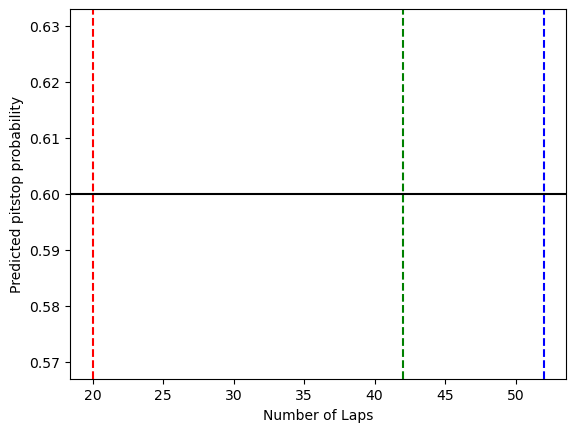

In [65]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.6, color='black')
plt.show()

In [66]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 1, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=500,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/10
411/411 [==============================] - 3s 4ms/step - loss: 0.7061 - accuracy: 0.6342 - val_loss: 0.3489 - val_accuracy: 0.9086
Epoch 2/10
411/411 [==============================] - 1s 3ms/step - loss: 0.6256 - accuracy: 0.6973 - val_loss: 0.4984 - val_accuracy: 0.7786
Epoch 3/10
411/411 [==============================] - 1s 3ms/step - loss: 0.6096 - accuracy: 0.7062 - val_loss: 0.5757 - val_accuracy: 0.7145
Epoch 4/10
411/411 [==============================] - 1s 3ms/step - loss: 0.6001 - accuracy: 0.7132 - val_loss: 0.7697 - val_accuracy: 0.5061
Epoch 5/10
411/411 [==============================] - 1s 3ms/step - loss: 0.5926 - accuracy: 0.7202 - val_loss: 0.5892 - val_accuracy: 0.6965
Epoch 6/10
411/411 [==============================] - 1s 3ms/step - loss: 0.5851 - accuracy: 0.7276 - val_loss: 0.6974 - val_accuracy: 0.5966
Epoch 7/10
411/411 [==============================] - 1s 3ms/step - loss: 0.5764 - accuracy: 0.7364 - val_loss: 0.7254 - val_a

In [67]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9147
Test accuracy: 0.9147090911865234
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     25661
           1       0.15      0.35      0.21       860

    accuracy                           0.91     26521
   macro avg       0.56      0.64      0.58     26521
weighted avg       0.95      0.91      0.93     26521



3/3 [==============================] - 0s 3ms/step


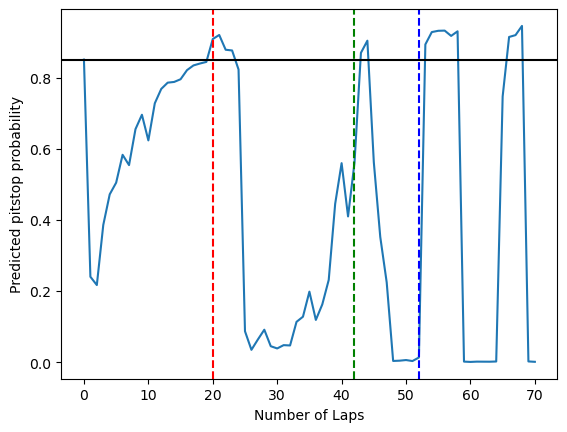

In [69]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.85, color='black')
plt.show()

In [70]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[23958  1703]
 [  559   301]]


In [71]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = np.where(y_train_resampled > 0.5, 1, 0)



input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 7, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=20, 
    batch_size=400,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/20
513/513 [==============================] - 3s 3ms/step - loss: 1.5133 - accuracy: 0.5000 - val_loss: 0.2167 - val_accuracy: 0.9676
Epoch 2/20
513/513 [==============================] - 1s 3ms/step - loss: 1.3699 - accuracy: 0.5005 - val_loss: 0.2309 - val_accuracy: 0.9666
Epoch 3/20
513/513 [==============================] - 1s 3ms/step - loss: 1.3437 - accuracy: 0.5053 - val_loss: 0.2063 - val_accuracy: 0.9672
Epoch 4/20
513/513 [==============================] - 1s 3ms/step - loss: 1.3289 - accuracy: 0.5078 - val_loss: 0.2156 - val_accuracy: 0.9659
Epoch 5/20
513/513 [==============================] - 1s 3ms/step - loss: 1.3179 - accuracy: 0.5099 - val_loss: 0.2277 - val_accuracy: 0.9643
Epoch 6/20
513/513 [==============================] - 1s 3ms/step - loss: 1.3081 - accuracy: 0.5115 - val_loss: 0.2136 - val_accuracy: 0.9656
Epoch 7/20
513/513 [==============================] - 1s 3ms/step - loss: 1.2998 - accuracy: 0.5131 - val_loss: 0.2324 - val_a

In [72]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 2ms/step - loss: 0.2412 - accuracy: 0.9539
Test accuracy: 0.9539232850074768
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     25661
           1       0.25      0.20      0.22       860

    accuracy                           0.95     26521
   macro avg       0.61      0.59      0.60     26521
weighted avg       0.95      0.95      0.95     26521



3/3 [==============================] - 0s 2ms/step


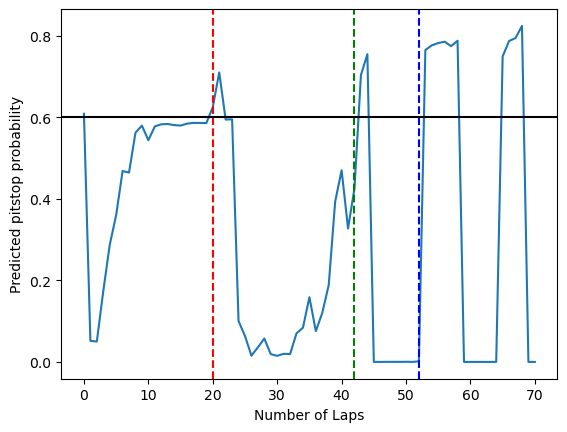

In [73]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.6, color='black')
plt.show()

In [74]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[25125   536]
 [  686   174]]


In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = np.where(y_train_resampled > 0.5, 1, 0)



input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 8, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=256,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/10
802/802 [==============================] - 3s 3ms/step - loss: 1.5841 - accuracy: 0.4997 - val_loss: 0.2272 - val_accuracy: 0.9671
Epoch 2/10
802/802 [==============================] - 2s 3ms/step - loss: 1.4523 - accuracy: 0.5001 - val_loss: 0.2470 - val_accuracy: 0.9656
Epoch 3/10
802/802 [==============================] - 2s 3ms/step - loss: 1.4167 - accuracy: 0.5013 - val_loss: 0.2183 - val_accuracy: 0.9663
Epoch 4/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3983 - accuracy: 0.5022 - val_loss: 0.2103 - val_accuracy: 0.9667
Epoch 5/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3849 - accuracy: 0.5024 - val_loss: 0.1901 - val_accuracy: 0.9670
Epoch 6/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3732 - accuracy: 0.5026 - val_loss: 0.1927 - val_accuracy: 0.9667
Epoch 7/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3602 - accuracy: 0.5031 - val_loss: 0.2107 - val_a

In [76]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9666
Test accuracy: 0.966630220413208
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     25661
           1       0.18      0.01      0.02       860

    accuracy                           0.97     26521
   macro avg       0.57      0.50      0.50     26521
weighted avg       0.94      0.97      0.95     26521



3/3 [==============================] - 0s 2ms/step


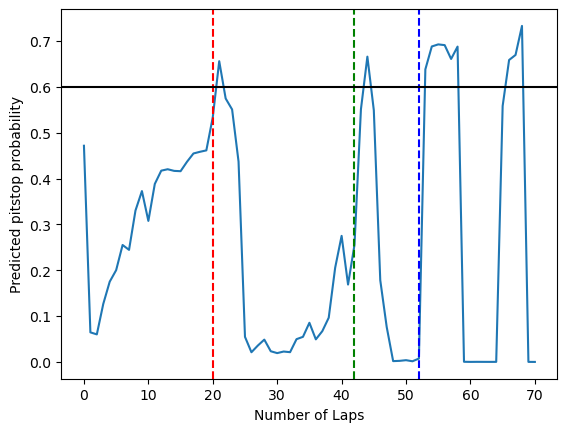

In [78]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.6, color='black')
plt.show()

In [79]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[25629    32]
 [  853     7]]


In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = np.where(y_train_resampled > 0.5, 1, 0)



input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 6, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=256,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/10
802/802 [==============================] - 3s 3ms/step - loss: 1.3886 - accuracy: 0.5010 - val_loss: 0.2805 - val_accuracy: 0.9577
Epoch 2/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3075 - accuracy: 0.5028 - val_loss: 0.2360 - val_accuracy: 0.9661
Epoch 3/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2531 - accuracy: 0.5107 - val_loss: 0.2993 - val_accuracy: 0.9424
Epoch 4/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2081 - accuracy: 0.5274 - val_loss: 0.2131 - val_accuracy: 0.9659
Epoch 5/10
802/802 [==============================] - 2s 3ms/step - loss: 1.1731 - accuracy: 0.5499 - val_loss: 0.2427 - val_accuracy: 0.9586
Epoch 6/10
802/802 [==============================] - 2s 3ms/step - loss: 1.1524 - accuracy: 0.5737 - val_loss: 0.2108 - val_accuracy: 0.9621
Epoch 7/10
802/802 [==============================] - 2s 3ms/step - loss: 1.1408 - accuracy: 0.5806 - val_loss: 0.2474 - val_a

In [81]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 1ms/step - loss: 0.3355 - accuracy: 0.8962
Test accuracy: 0.8961577415466309
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     25661
           1       0.16      0.50      0.24       860

    accuracy                           0.90     26521
   macro avg       0.57      0.71      0.59     26521
weighted avg       0.96      0.90      0.92     26521



3/3 [==============================] - 0s 3ms/step


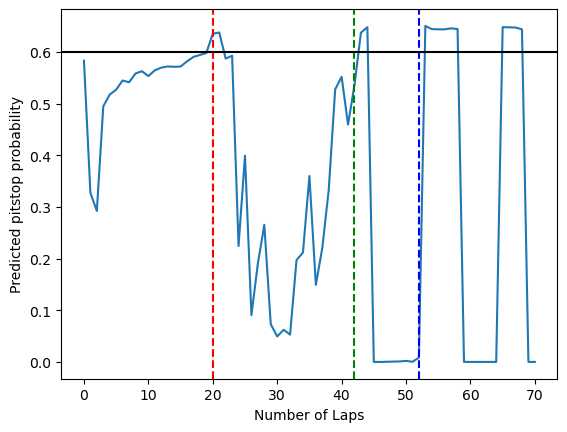

In [82]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.6, color='black')
plt.show()

In [83]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[23334  2327]
 [  427   433]]


In [84]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = np.where(y_train_resampled > 0.5, 1, 0)



input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 6, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=256,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/10
802/802 [==============================] - 4s 3ms/step - loss: 1.4229 - accuracy: 0.5031 - val_loss: 0.2557 - val_accuracy: 0.9672
Epoch 2/10
802/802 [==============================] - 2s 3ms/step - loss: 1.3052 - accuracy: 0.5126 - val_loss: 0.3461 - val_accuracy: 0.9221
Epoch 3/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2779 - accuracy: 0.5165 - val_loss: 0.2575 - val_accuracy: 0.9640
Epoch 4/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2624 - accuracy: 0.5187 - val_loss: 0.2492 - val_accuracy: 0.9636
Epoch 5/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2479 - accuracy: 0.5212 - val_loss: 0.2116 - val_accuracy: 0.9658
Epoch 6/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2316 - accuracy: 0.5248 - val_loss: 0.2147 - val_accuracy: 0.9648
Epoch 7/10
802/802 [==============================] - 2s 3ms/step - loss: 1.2126 - accuracy: 0.5322 - val_loss: 0.2514 - val_a

In [85]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9545
Test accuracy: 0.9544512033462524
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     25661
           1       0.23      0.18      0.20       860

    accuracy                           0.95     26521
   macro avg       0.60      0.58      0.59     26521
weighted avg       0.95      0.95      0.95     26521



3/3 [==============================] - 0s 3ms/step


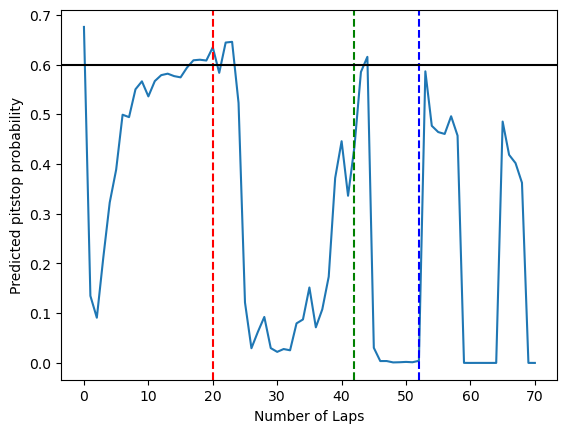

In [86]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.6, color='black')
plt.show()

In [87]:
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[25159   502]
 [  706   154]]


In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    important_attributes_copy.drop(['pit'], axis=1),
    important_attributes_copy['pit'],
    test_size=0.2,
    random_state=42
) 


# Ensure that y_train and y_test only contain values of 0 and 1
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)


# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=32)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled = np.where(y_train_resampled > 0.5, 1, 0)



input_dim = X_train_resampled.shape[1]  # Get the number of features
print(f"Number of features: {input_dim}")

# Define your neural network model

model = Sequential([
    Dense(8, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     Dropout(0.5),
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Second hidden layer with 64 neurons
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
#     Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), # Fourth hidden layer with 64 neurons
#     Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the neural network
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

class_weights = {0: 7, 1: 1}
# Train the neural network
model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=256,
    class_weight=class_weights
)



Number of features: 8
Epoch 1/10
802/802 [==============================] - 3s 2ms/step - loss: 1.5245 - accuracy: 0.5004 - val_loss: 0.1978 - val_accuracy: 0.9676
Epoch 2/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3954 - accuracy: 0.5001 - val_loss: 0.2080 - val_accuracy: 0.9674
Epoch 3/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3813 - accuracy: 0.5002 - val_loss: 0.2182 - val_accuracy: 0.9670
Epoch 4/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3708 - accuracy: 0.5007 - val_loss: 0.2201 - val_accuracy: 0.9670
Epoch 5/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3603 - accuracy: 0.5024 - val_loss: 0.2143 - val_accuracy: 0.9649
Epoch 6/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3452 - accuracy: 0.5050 - val_loss: 0.2230 - val_accuracy: 0.9657
Epoch 7/10
802/802 [==============================] - 2s 2ms/step - loss: 1.3314 - accuracy: 0.5060 - val_loss: 0.2046 - val_a

In [89]:
# Evaluate the performance of the neural network
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.50).astype(int)

# Print classification report

print(classification_report(y_test, y_pred_binary))

829/829 [==============================] - 1s 1ms/step - loss: 0.2276 - accuracy: 0.9628
Test accuracy: 0.962821900844574
829/829 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25661
           1       0.23      0.06      0.10       860

    accuracy                           0.96     26521
   macro avg       0.60      0.53      0.54     26521
weighted avg       0.95      0.96      0.95     26521



3/3 [==============================] - 0s 3ms/step


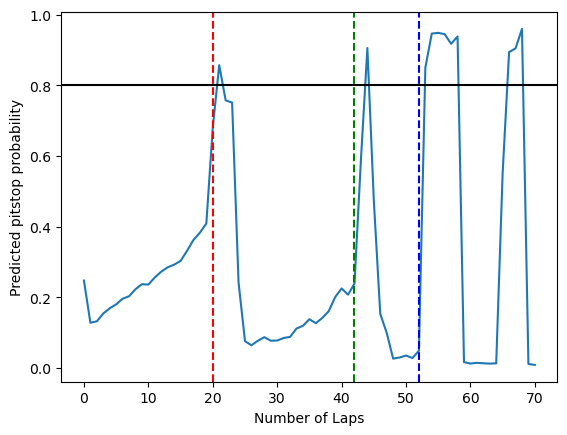

In [91]:
# Load the dataset you want to make predictions on
X_new = pred_df

# Make predictions on the new dataset
y_pred = model.predict(X_new)

import matplotlib.pyplot as plt


plt.plot(y_pred)
# Add vertical lines
plt.axvline(x=20, color='red', linestyle='--')
plt.axvline(x=42, color='green', linestyle='--')
plt.axvline(x=52, color='blue', linestyle='--')
# Add x and y axis labels
plt.xlabel('Number of Laps')
plt.ylabel('Predicted pitstop probability')
plt.axhline(y=0.8, color='black')
plt.show()

In [94]:

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)


[[25480   181]
 [  805    55]]
